## Introduction



-   [https://git.io/ml2019-11](https://git.io/ml2019-11)
-   Today we will look at a dimensional reduction technique call *Principal Components Analysis*
-   This will be good for visualization and to create reduced datasets
    that can be fit quicker/easier with less resources



## Large Dimensions



![img](hypervolume.png)

-   High dimensional behaviour is hard to visualize
-   As you increase the number of dimensions, the ratio of the volume of
    a hypersphere to a hypercube tends to 0
    -   This mean there is no "center" to high dimensional objects, all
        points exist on the border
-   This has non-intuitive consequences, e.g., the expected value of the
    difference between the largest and smallest distance between two
    randomly picked points tends to zero as the dimensions increase



## The Curse of Dimensionality



-   In ML, each of our "features" is a dimension
-   We think naively collecting more features will result in better discrimination
-   But in fact, it can lead to worse results due to the 
    -   We're usually define some kind of "distance" between datapoints
        when we are building models
    -   But with too many dimensions, the distance between points stops
        being useful, so our algorithms are unable to be trained
    -   In high dimensions, the volume becomes so massive, its impossible
        to get enough datapoints to fill out space
    -   The "curse of dimensionality"



## In Machine Learning



-   The assumption was that we're evenly distributed over the unit hypercube
-   The whole point of classification in machine learning is that
    different categories distribute differently
-   Quite often, the data tends to clump in lower dimensional subspaces
-   We want to reduce the number of dimensions while retaining variance
    -   I.e. we will need feature selection
-   PCA is one way to automatically reduce the number of data dimensions
    in a "sensible" manner



## Principal Component Analysis



![img](finding_components.png)

-   In PCA we search for the axis along which the data has the maximum
    variance
    -   This becomes our first axis
-   Then, project out that axis, flatten the data onto a hyperplane
    where the variance due to the first axis is gone (the plane perp. to
    the axis)
-   Now, find the next axis in the (n-1) space with the highest variance
-   Keep going until we have a fully orthogonal set of basis vectors
-   We can instead stop this procedure after d dimensions
    -   Then we have a reduced dimensional dataset



## Example Iris Dataset



![img](./.ob-jupyter/386925f8c870dc372a8d3674b638de3f094b486f.png)

-   Using only the sepal features (length and width, show left), PCA in
    2d transforms the data along the diagonal axis (right)
    -   In 2D, once we have first vector, second automatically found,
        since we end up with an orthogonal basis after PCA



## Example Iris continued



![img](./.ob-jupyter/b77eab3b834fa8cb61f5e5f92359c20f5eb004b0.png)

-   Using all the features (bot. right), you can see that mostly the
    same axis is found, but with some additional variation
    -   The covariance of the full datasets removed, not necessarily each
        individual component to be classified



## MNIST after PCA



### :BMCOL:



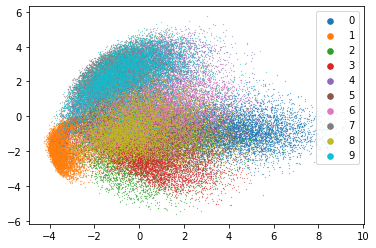

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import numpy as np

X, y = fetch_openml('mnist_784', version=1, 
                    return_X_y=True)
X = X / 255.

pca = PCA(n_components=2)
pca.fit(X)
x = pca.transform(X)
 # y is stored as a string
y = y.astype(np.int)

for n in range(10):
    xx = x[y==n]
    plt.scatter(xx[:,0], xx[:,1],
                s=0.05, label=str(n))
leg = plt.legend(markerscale=25)

### :BMCOL:



![img](./.ob-jupyter/086466ebc096103c66178a755e73528daff3a384.png)



### :B_ignoreheading:



-   Two-component PCA on the MNIST digit dataset
    -   A 28x28 grayscale image is just a 784-dim. hypercube



## MNIST PCA Components



### :BMCOL:



In [1]:
pca=PCA(n_components=25)
pca.fit(X)
for i in range(25):
    plt.subplot(5, 5, (i+1))
    plt.imshow(pca.components_[i].reshape(28,28), 
               cmap='gray_r')
    plt.gca().xaxis.set_visible(False) 
    plt.gca().yaxis.set_visible(False)
print(np.cumsum(pca.explained_variance_ratio_[:25]))

[0.09746116 0.16901561 0.23051091 0.28454476 0.3334341  
 0.37648637 0.40926898 0.4381654  0.46574904 0.48917044
 0.51023733 0.53061286 0.5476835  0.5646237  0.58045752
 0.59532097 0.60851455 0.62130469 0.6331771  0.64470642
 0.65536679 0.66546472 0.67505596 0.68415214 0.69298103]

### :BMCOL:



![img](./.ob-jupyter/6b7fac0a1a6fe153b991f1f933504b8e6ff4e135.png)



### :B_ignoreheading:



-   A component is just a vector in the 784D space, so we can plot them
    as 28x28 images (bearing in mind that here they can go negative)
-   First two images in the top row are the components of the prev. page
-   We can see what fraction of the variance of the dataset is explained
    by each component, and take the cumulative sum (`np.cumsum`) to see
    the fraction explained by the first N components



## As a Compression Technique



### :BMCOL:



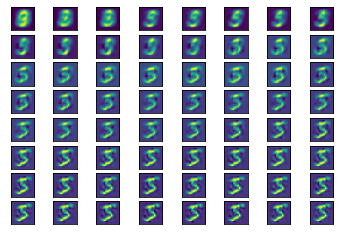

In [1]:
for i in range(64):
    pca=PCA(n_components=i+1)
    pca.fit(X)
    t = pca.transform([X[0]])
    plt.subplot(8, 8, (i+1))
    plt.imshow(pca.inverse_transform(t).\
               reshape(28,28))
    plt.gca().xaxis.set_visible(False) 
    plt.gca().yaxis.set_visible(False)

### :BMCOL:



![img](./.ob-jupyter/9da04e11db56a36ccdb62df2cb8b91feaa466363.png)



### :B_ignoreheading:



-   We can use PCA as a rudimentary "compression" technique
-   Fit PCA and transform the image, but only keep N components
-   Can reconstruct by summing up the components (of course, this also
    requires you the keep N images, one showing each component)
-   Here, we see the first image of MNIST reconstructed with
    progressively more and more components



## Technical Points



-   If we represent our data as rows in a matrix $X$, then PCA is
    equivalent to finding basis which diagonalizes $X^TX$
-   $X^TX$ is essentially the covariance, so we also have:
    -   The principal components are the eigenvectors of the covariance matrix
    -   The prinicpal components are a decorrelated basis for our measurement
-   The principal components can also be obtained by SVD decomposition
    -   $X = USV^T$ where S is diagonal, values gives the "strength" of
        the decomposition, reducing S to the top n gives the n-dim PCA



In [1]:
pca=PCA(2)
pca.fit(x)
X_centered = x - x.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered.astype(np.float))
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
print("Via SVD:", c1, '\n', c2, '\nVia sklearn PCA:', pca.components_)

Via SVD: [ 0.36158968 -0.08226889  0.85657211  0.35884393] 
 [-0.65653988 -0.72971237  0.1757674   0.07470647] 
Via sklearn PCA: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

## Exercises



Recently, another "MNIST" dataset has gained in popularity in the
machine learning community, the "fashion MNIST" dataset.

It contains images of various clothing in 10 categories, with the goal
again to classify the images into the categories. The categories are:
"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
"Shirt", "Sneaker", "Bag", "Ankle boot", which are labelled 0 to 9 in
this order in the output. There are 60,000 training images and 10,000
test images.

The next cell will download the fashion MNIST dataset:



In [1]:
%%time
from sklearn.datasets import fetch_openml
import numpy as np
X, y = fetch_openml(name="Fashion-MNIST", return_X_y=True)

trainX = X[:60000]/255.
trainY = y[:60000].astype(np.int)
testX = X[60000:]/255.
testY = y[60000:].astype(np.int)

Make "gray"-scale images of the first 5 images in the training set, to
get an idea of what the data looks like. The images are stored as a
768D array, and should be reshaped into 28x28 before using `imshow`



Now, make a PCA object and fit for the first 2 PCA components.



Now, plot the dataset in the 2 components of the PCA, as was done in
the lecture for the MNIST dataset. Which classes are near to/on top of
each other? Does it make sense to you that they would group together?



Now, make a new PCA with 25 components. Plot, in a 5x5 grid, the first
25 components.



Make a PCA of the first 250 components. Make a plot of the cumulative
explained variance versus number of components.



If you finish fast and have some time to spend, you could try to:

1.  Fit a neural network classifier using an n component PCA for n from
    2 to 200 (you only need to fit the PCA once). Make a plot of
    accuracy on the training and test dataset versus n components.
2.  Try running the "image compression" on one of the fashion MNIST
    images. Make a series of images, adding more and more of the PCA
    components and seeing how many components are required for the
    image to resolve.

